In [ ]:
#Load Dataset
!wget http://vis-www.cs.umass.edu/lfw/lfw-a.tgz
!tar -xvzf lfw-a.tgz

In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
import tempfile
import urllib.request
import numpy as np
from sklearn.neighbors import NearestNeighbors
import requests
from bs4 import BeautifulSoup
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [46]:
class Flex_Search:
  def __init__(self):
    self.neighbors=10
    self.model = NearestNeighbors(n_neighbors=self.neighbors, algorithm='brute', metric='euclidean')
  #-------------------------------------------------
  def vector(self,path):
    if 'http' in path:
      format = '.'+path.split('.')[-1]
      temp = tempfile.NamedTemporaryFile(suffix=format)
      urllib.request.urlretrieve(path,temp.name)
      img = face_recognition.load_image_file(temp.name)
      temp.close()
    else: img = face_recognition.load_image_file(path)
    try: return face_recognition.face_encodings(img)[0]
    except: return np.empty(128)
  #-------------------------------------------------
  def find(self,path,data_arr,vector_arr,flag=False):
    self.model.fit(vector_arr)
    vector = [self.vector(path)]
    distances,indices = self.model.kneighbors(vector)
    result_arr=[]; distance_arr=[]
    for i,ind in enumerate(indices[0]):
      if face_recognition.compare_faces([vector_arr[ind]], vector[0])[0]:
        result_arr.append(data_arr[ind])
        distance_arr.append(distances[0][i])
    res=[[x,y] for y,x in sorted(zip(distance_arr,result_arr))] 
    if len(res)<3: res=res+[[]]*(3-len(res))
    res={'res1':res[0],'res2':res[1],'res3':res[2]}
    if flag: 
      self.plot(path)
      for i in res: self.plot(res[i][0])
    return res
  #-------------------------------------------------
  def plot(self,path):
    if 'http' in path:
      format = '.'+path.split('.')[-1]
      temp = tempfile.NamedTemporaryFile(suffix=format)
      urllib.request.urlretrieve(path,temp.name)
      plt.imshow(mpimg.imread(temp.name))
      plt.show()
      temp.close()
    else: plt.imshow(mpimg.imread(path)); plt.show()

In [ ]:
#load data & vectors
import os
from tqdm.notebook import tqdm_notebook
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

root_dir = '/content/lfw'
data = sorted(get_file_list(root_dir))
vectors = []
f=Flex_Search()
for i in tqdm_notebook(range(len(data))):
    vectors.append(f.vector(data[i]))

  0%|          | 0/1054 [00:00<?, ?it/s]

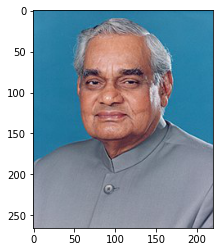

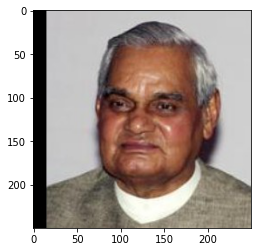

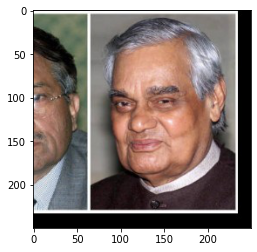

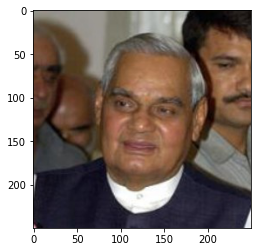

{'res1': ['/content/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0005.jpg',
  0.24688376731205205],
 'res2': ['/content/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0002.jpg',
  0.2552149971419504],
 'res3': ['/content/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0003.jpg',
  0.28130339276474625]}

In [47]:
query='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Atal_Bihari_Vajpayee_tribute_image_%28cropped%29.jpg/220px-Atal_Bihari_Vajpayee_tribute_image_%28cropped%29.jpg'
Flex_Search().find(query,data,vectors,True)

In [ ]:
class render:
  def __init__(self):
    self.img = lambda profile : "https://trackthemissingchild.gov.in/trackchild/intra_trackchild/images_missing/"+ profile +".jpg"
    self.profile = lambda ID : "https://trackthemissingchild.gov.in/trackchild/missing_dtl.php?missing_id=" + ID
    self.report = lambda profile : "https://trackthemissingchild.gov.in/trackchild/photograph_info_ps.php?profile_no=" +profile +"&return_page=photograph_missing.php&type=missing&authority=1"
  def get(self,array):
    return self.img(array[1])
  def fetch(self,array):
    details = self.personal_details(array)
    res={}
    res["Img"] = self.img(array[1])
    res["Report_link"] = self.report(array[1])
    res["Profile_link"] = self.profile(array[0]) 
    res["Name"] = details[0]
    res["Current_Age"] = details[1]
    res["Gender"] = details[2]
    res["Father_Name"] = details[3]
    res["Place_of_Missing"] = details[4]
    res["Date_of_Missing"] = details[5]
    return res
  def personal_details(self,array):
    url = self.profile(array[0])
    html = requests.get(url)
    scrapper = BeautifulSoup(html.text,'html.parser')
    p_tags = scrapper.findAll('p')
    details=[]
    for para in p_tags:
      details += [data.replace(u'\xa0', u'') for data in para.get_text().split(":")]
    return details[1::2]

In [ ]:
input= ['47.46.52.45.52.44.49.105.108.115.46.44.46.46.44.44.45.44.102','3281805mpw20220010']
print(render().fetch(input)) #retrive_data

{'Img': 'https://trackthemissingchild.gov.in/trackchild/intra_trackchild/images_missing/3281805mpw20220010.jpg', 'Report_link': 'https://trackthemissingchild.gov.in/trackchild/photograph_info_ps.php?profile_no=3281805mpw20220010&return_page=photograph_missing.php&type=missing&authority=1', 'Profile_link': 'https://trackthemissingchild.gov.in/trackchild/missing_dtl.php?missing_id=47.46.52.45.52.44.49.105.108.115.46.44.46.46.44.44.45.44.102', 'Name': 'PANCHANU KUMAR RAJAK', 'Current_Age': '17 Years 0 Months 9 Days', 'Gender': 'MALE', 'Father_Name': 'BHUDEB  RAJAK', 'Place_of_Missing': 'SREEBHUMI', 'Date_of_Missing': '10/03/2022'}


In [ ]:
input= ['47.46.52.45.52.44.49.105.108.115.46.44.46.46.44.44.45.44.102','3281805mpw20220010']
print(render().get(input)) #retrive_Image_link

https://trackthemissingchild.gov.in/trackchild/intra_trackchild/images_missing/3281805mpw20220010.jpg


In [ ]:
class Database:
  def __init__(self,database,):
    self.db = database.db.Data
  #-------------------------------------------------------------
  def GET(self,ID) :
    mydoc = self.db.find({"_id":ID})
    for json in mydoc: return json['Array']
    self.db.insert_one({"_id":ID,"Array":[]})
    return []
 #-------------------------------------------------------------
  def SET(self,ID,VALUE):
    query = {"_id":ID}
    value = {"$set":{"Array":VALUE}}
    self.db.update_one(query,value)

In [ ]:
class Missing_ID:
  def __init__(self,db):
    self.db = db
    self.URL = 'https://trackthemissingchild.gov.in/trackchild/photograph_missing.php?page='
    self.data = self.db.GET('data')
  #-------------------------------------------------------------
  def page(self,number):
    web = requests.post(self.URL+str(number))
    soup = BeautifulSoup(web.text,'html.parser')
    achors = soup.findAll('a',class_='thumbnail')
    missing_ids = []
    for block in achors:
      value=block['value']
      age_index = value.find("Current Age : ")+14
      id_index = value.find("missing_id=")+11
      Profile_no_index = value.find("profile_no=")+11
      age = int((value[age_index:age_index+3].split())[0])
      ID = value[id_index:id_index+60]
      Profile_no = value[Profile_no_index:Profile_no_index+18]
      if age<18:
        missing_ids.append([ID,Profile_no])
    return missing_ids
  #-------------------------------------------------------------
  def fetch(self,index=1):
    while True:
       IDs = self.page(index)
       if IDs == [] : break
       for ID in IDs:
         if ID[0] in self.data : 
           self.SET(); 
           return self.data
         else: 
           self.data.append(ID[0]) 
           self.data.sort()
           self.ADD(ID[0],ID[1])
       print('rendered page : ',index)
       self.SET(); index+=1
    return self.data
  #-------------------------------------------------------------
  def train(self,index):
    val=self.db.GET(index)
    if val==[]:
      IDs = self.page(index)
      if IDs == [] : return False
      self.db.SET(index,IDs)
      return True
    else:
      return True

In [ ]:
from multiprocessing import Process
from bs4 import BeautifulSoup
import requests

class ThreadWithResult(threading.Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs={}, *, daemon=None):
        def function():
            self.result = target(*args, **kwargs)
        super().__init__(group=group, target=function, name=name, daemon=daemon)


def page(number):
    web = requests.post('https://trackthemissingchild.gov.in/trackchild/photograph_missing.php?page='+str(number))
    soup = BeautifulSoup(web.text,'html.parser')
    achors = soup.findAll('a',class_='thumbnail')
    missing_ids = []
    for block in achors:
      value=block['value']
      age_index = value.find("Current Age : ")+14
      id_index = value.find("missing_id=")+11
      Profile_no_index = value.find("profile_no=")+11
      age = int((value[age_index:age_index+3].split())[0])
      ID = value[id_index:id_index+60]
      Profile_no = value[Profile_no_index:Profile_no_index+18]
      if age<18:
        missing_ids.append([ID,Profile_no])
    return missing_ids

def batch(j):
  p =[ ThreadWithResult(target = page,args=(i,)) for i in range(j,j+batch_size+1) ]
  for i in p: i.start()
  for i in p: i.join()  
  res = [ i.result for i in p ]
  return res

batch_size=25
data=[]
for i in range(1,8500,batch_size):
  data+=batch(i)  
  print(i)